In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data245_cleaneddata=pd.read_csv("https://raw.githubusercontent.com/Sowmyadiya/Data245-Project/master/Datasets/proj_data245_testing.csv")


In [4]:
data245_cleaneddata=data245_cleaneddata.drop(['Unnamed: 0'], axis = 1)


In [5]:
data245_cleaneddata

,state,job_opportunity_rank,affordability,economy,education and health,quality of life,safety,Climate,title,totalyearlycompensation,yearsofexperience,Education
0,Alabama,2,0,3,4,4,4,0,Software Engineer,84000,3.0,-1
1,Alabama,2,0,3,4,4,4,0,Software Engineer,70000,2.0,-1
2,Alabama,2,0,3,4,4,4,0,Software Engineer,112000,5.0,1
3,Alabama,2,0,3,4,4,4,0,Software Engineer,71000,2.0,-1
4,Alabama,2,0,3,4,4,4,0,Software Engineer,84000,2.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
52240,Wisconsin,1,3,1,0,0,0,4,Software Engineering Manager,334000,10.0,1
52241,Wisconsin,1,3,1,0,0,0,4,Software Engineer,105000,0.0,-1
52242,Wisconsin,1,3,1,0,0,0,4,Software Engineer,115000,2.0,-1
52243,Wisconsin,1,3,1,0,0,0,4,Software Engineer,115000,0.0,-1


In [6]:
final_data = pd.get_dummies(data = data245_cleaneddata, columns = ['title'])
df = final_data.loc[ : , final_data.columns != 'state']

target_data=data245_cleaneddata['state']
X = df

In [7]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df,target_data,test_size=0.30,random_state=42,stratify=target_data)


## Decision Tree Algorithm

In [9]:
DT_model = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 5, min_samples_leaf = 5)
DT_model.fit(Xtrain, Ytrain)
y_pred_DT = DT_model.predict(Xtest)
print(accuracy_score(Ytest, y_pred_DT))

0.9585938496873804


In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(Ytest,y_pred_DT, average='macro')
recall = recall_score(Ytest,y_pred_DT,average='macro')
f1_score= f1_score(Ytest, y_pred_DT, average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score: ',f1_score)

Precision:  0.31253565274153167
Recall:  0.3617021276595745
F1-Score:  0.3296562950599967


/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


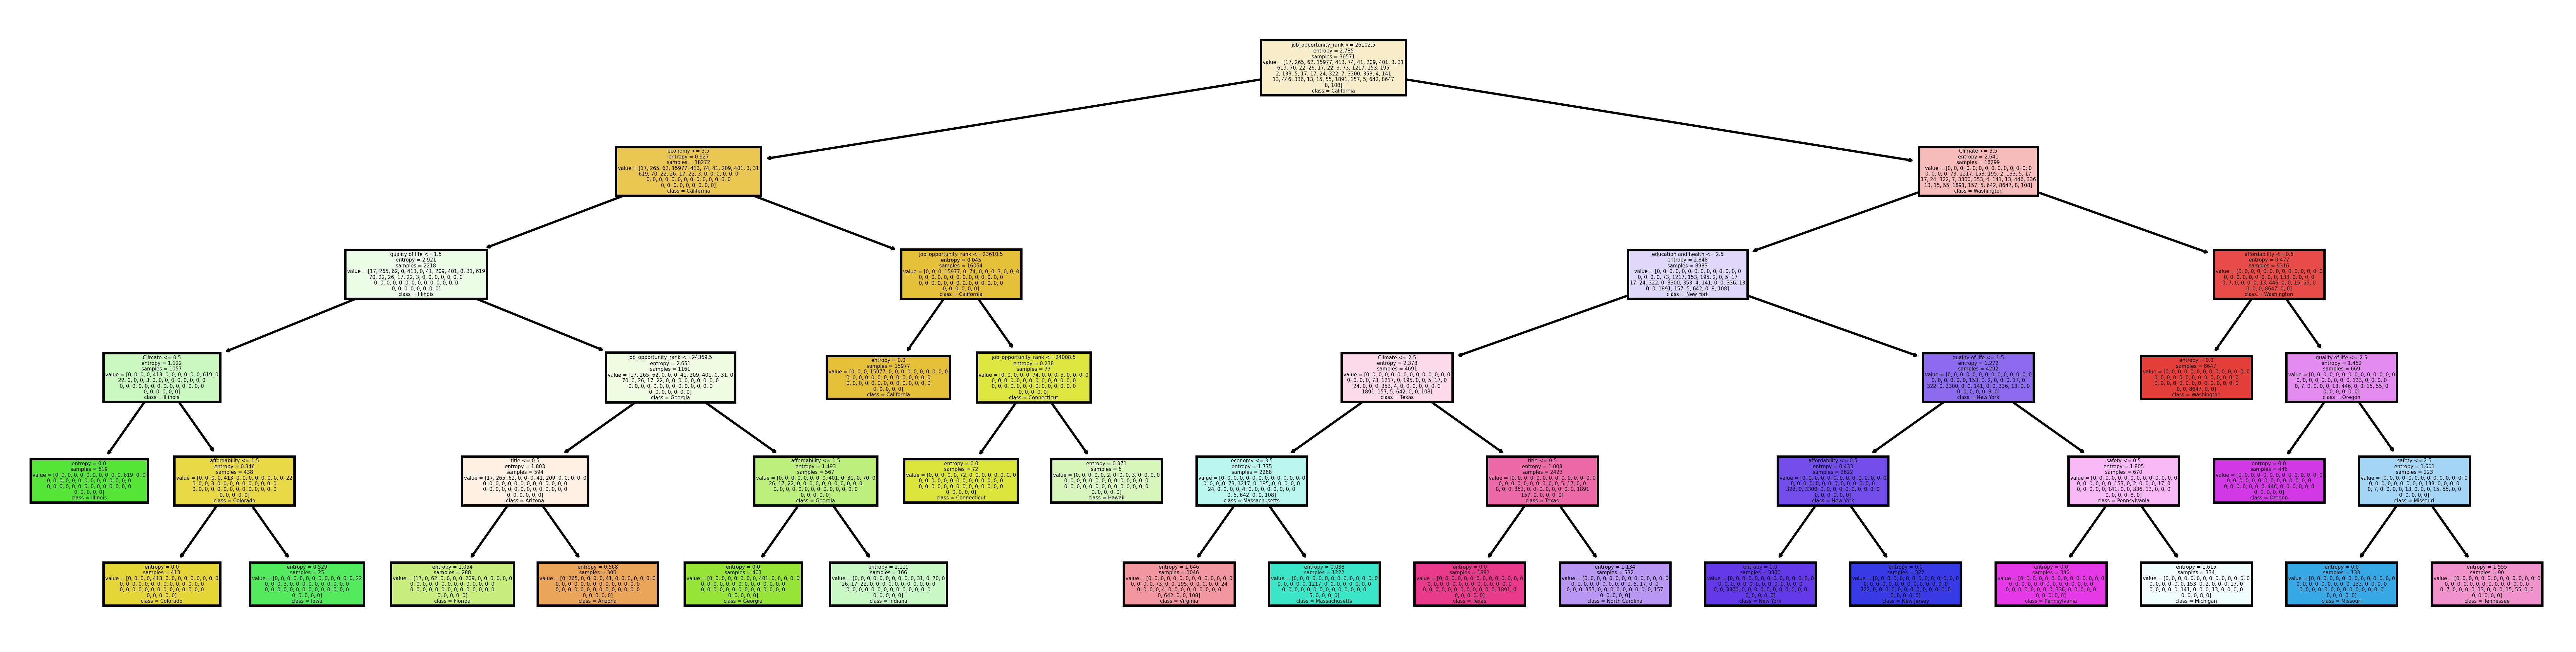

In [12]:
fn=['job_opportunity_rank','affordability','economy','education and health','quality of life',
   'safety','Climate','title','totalyearlycompensation','yearsofexperience','Education']
cn=np.unique(target_data)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,5), dpi=500)
tree.plot_tree(DT_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Precision Recall F1-Score and Support for Decision Tree

In [13]:
print(classification_report(Ytest,y_pred_DT))

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

       Alabama       0.00      0.00      0.00         8
       Arizona       0.86      1.00      0.93       114
      Arkansas       0.00      0.00      0.00        26
    California       1.00      1.00      1.00      6847
      Colorado       1.00      1.00      1.00       177
   Connecticut       1.00      0.97      0.98        32
      Delaware       0.00      0.00      0.00        18
       Florida       0.72      1.00      0.84        89
       Georgia       1.00      0.99      1.00       172
        Hawaii       0.50      1.00      0.67         1
         Idaho       0.00      0.00      0.00        14
      Illinois       1.00      1.00      1.00       266
       Indiana       0.42      1.00      0.59        30
          Iowa       0.90      1.00      0.95         9
        Kansas       0.00      0.00      0.00        11
      Kentucky       0.00      0.00      0.00         7
     Louisiana       0.00      0.00      0.00  

### Confusion Matrix For Decision Tree

Text(115.0, 0.5, 'Predicted')

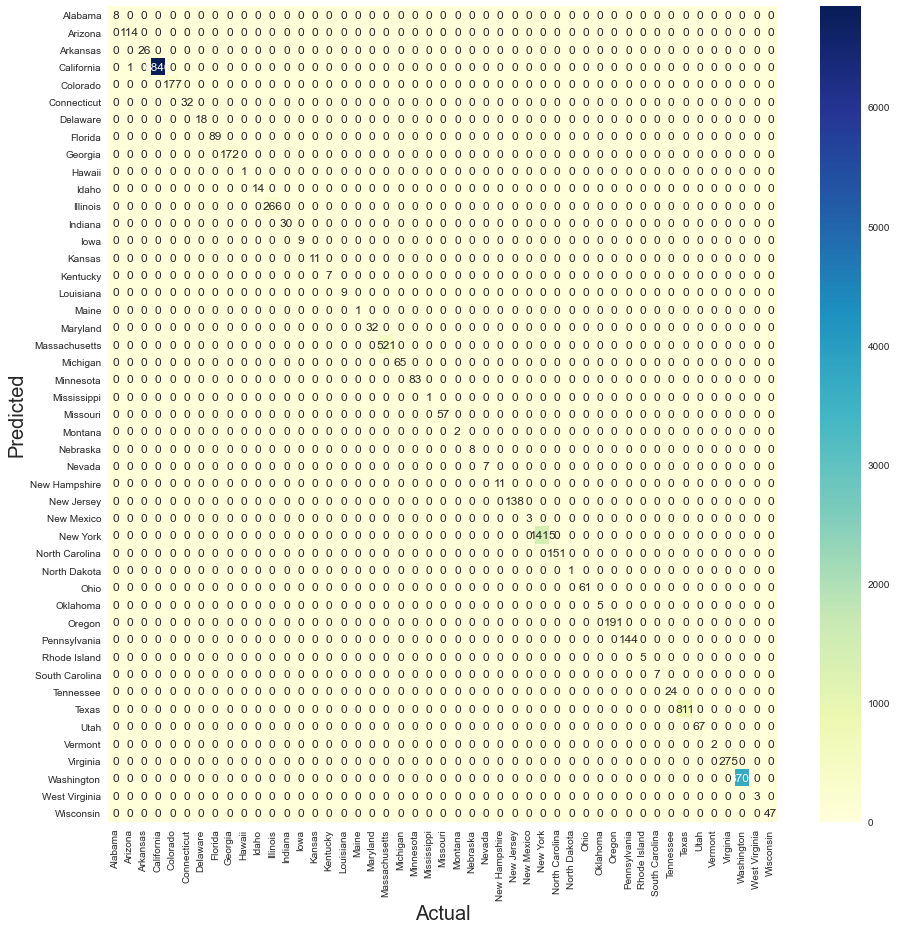

In [64]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

DT_model_CF = DecisionTreeClassifier()
DT_model_CF.fit(Xtrain, Ytrain)
y_pred_DT = DT_model_CF.predict(Xtest)

labels=unique_labels(Ytest)
column=[f'{label}'for label in labels]
indeces=[f'{label}'for label in labels]
table = pd.DataFrame(confusion_matrix(Ytest,y_pred_DT),columns=column,index=indeces)
fig, ax = plt.subplots(figsize=(15,15)) 
ps=sns.heatmap(table,annot=True, fmt='d',cmap='YlGnBu')
ps.set_xlabel("Actual",fontsize=20)
ps.set_ylabel("Predicted",fontsize=20)

### ROC - AUC Curve for Decision Tree

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


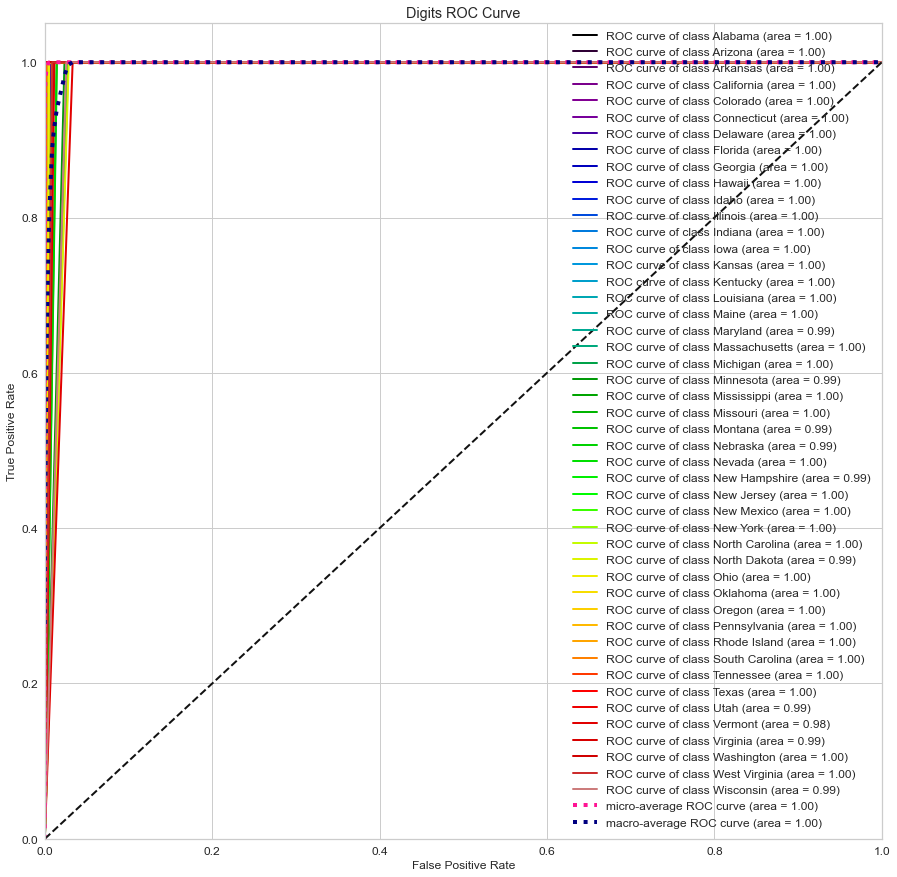

In [15]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,target_data,test_size=0.3,stratify=target_data)


Y_test_probs = DT_model.predict_proba(Xtest)

skplt.metrics.plot_roc_curve(Ytest, Y_test_probs,
                       title="Digits ROC Curve", figsize=(15,15));

### Stratified K-fold For Decision Tree

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

#
# Create an instance of Pipeline
#
pipeline = make_pipeline(DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 5, min_samples_leaf = 5))
#Xtrain,Xtest,Ytrain,Ytest
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(Xtrain, Ytrain)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(Xtrain.iloc[train, :], Ytrain.iloc[train])
    score = pipeline.score(Xtrain.iloc[test, :], Ytrain.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: , Accuracy: %.3f' % (k+1, score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fold:  1, Training/Test Split Distribution: , Accuracy: 0.972
Fold:  2, Training/Test Split Distribution: , Accuracy: 0.972
Fold:  3, Training/Test Split Distribution: , Accuracy: 0.972
Fold:  4, Training/Test Split Distribution: , Accuracy: 0.972
Fold:  5, Training/Test Split Distribution: , Accuracy: 0.972
Fold:  6, Training/Test Split Distribution: , Accuracy: 0.972
Fold:  7, Training/Test Split Distribution: , Accuracy: 0.972
Fold:  8, Training/Test Split Distribution: , Accuracy: 0.972
Fold:  9, Training/Test Split Distribution: , Accuracy: 0.971
Fold: 10, Training/Test Split Distribution: , Accuracy: 0.972


Cross-Validation accuracy: 0.972 +/- 0.000


### Hypertuning For Decision Tree

In [12]:
def train_using_gini(X_train, X_test, y_train):

    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)


    clf_gini.fit(X_train, y_train)
    return clf_gini

# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 5, min_samples_leaf = 5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):

    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):

    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
    
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

    print("Report : ",
    classification_report(y_test, y_pred))

# Driver code
def main():

    # Building Phase
    #data = importdata()
    Y = target_data
    X = df
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=42)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
    return y_pred_entropy  

# Calling main function
if __name__=="__main__":
    y_pred_entropy=main()

Results Using Gini Index:
Predicted values:
['California' 'Washington' 'California' ... 'New York' 'Massachusetts'
 'California']
Confusion Matrix:  [[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ... 3689    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
Accuracy :  88.05027433967079


/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                  precision    recall  f1-score   support

       Alabama       0.00      0.00      0.00         7
       Arizona       0.00      0.00      0.00       112
      Arkansas       0.00      0.00      0.00        37
    California       1.00      1.00      1.00      6853
      Colorado       0.00      0.00      0.00       159
   Connecticut       0.00      0.00      0.00        31
      Delaware       0.00      0.00      0.00        20
       Florida       0.00      0.00      0.00        72
       Georgia       0.00      0.00      0.00       173
         Idaho       0.00      0.00      0.00        19
      Illinois       0.00      0.00      0.00       242
       Indiana       0.00      0.00      0.00        33
          Iowa       0.00      0.00      0.00         8
        Kansas       0.00      0.00      0.00        11
      Kentucky       0.00      0.00      0.00         6
     Louisiana       0.00      0.00      0.00         9
         Maine       0.00      0.00  

/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                  precision    recall  f1-score   support

       Alabama       0.00      0.00      0.00         7
       Arizona       0.46      1.00      0.63       112
      Arkansas       0.00      0.00      0.00        37
    California       1.00      1.00      1.00      6853
      Colorado       0.69      1.00      0.81       159
   Connecticut       0.00      0.00      0.00        31
      Delaware       0.00      0.00      0.00        20
       Florida       1.00      1.00      1.00        72
       Georgia       0.97      1.00      0.98       173
         Idaho       0.00      0.00      0.00        19
      Illinois       0.80      1.00      0.89       242
       Indiana       0.00      0.00      0.00        33
          Iowa       0.00      0.00      0.00         8
        Kansas       0.00      0.00      0.00        11
      Kentucky       0.00      0.00      0.00         6
     Louisiana       0.00      0.00      0.00         9
         Maine       0.00      0.00  

### Plotting Accuracy score for Decision Tree

/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


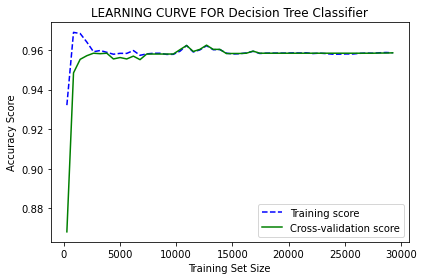

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# # Load data set
# dataset = load_digits()

# # X contains data and y contains labels
# X, y = dataset.data, dataset.target

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 5, min_samples_leaf = 5), Xtrain, Ytrain, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b", label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR Decision Tree Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()



### Using GINI

/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


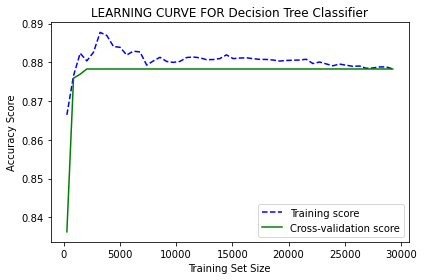

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# # Load data set
# dataset = load_digits()

# # X contains data and y contains labels
# X, y = dataset.data, dataset.target

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5), Xtrain, Ytrain, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b", label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR Decision Tree Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [18]:
DT_classifier = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=5, min_samples_leaf=5)
DT_classifier.fit(Xtrain, Ytrain)
print(f'Training Accuracy: {DT_classifier.score(Xtrain,Ytrain)*100}%')
print(f'Testing Accuracy: {DT_classifier.score(Xtest,Ytest)*100}%')

Training Accuracy: 95.86284214268136%
Testing Accuracy: 95.85938496873804%


# KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support

#yk_pred = KNeighborsClassifier(n_neighbors=5).fit(Xtrain,Ytrain).predict(Xtest)

knn_clf = KNeighborsClassifier(n_neighbors=12)
knn_clf.fit(Xtrain,Ytrain)

y_pred_knn=knn_clf.predict(Xtest)

print(accuracy_score(Ytest, y_pred_knn))

0.9043001148398622


In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
precision = precision_score(Ytest,y_pred_knn, average='macro')
recall = recall_score(Ytest,y_pred_knn,average='macro')
f1_score = f1_score(Ytest,y_pred_knn,average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

Precision:  0.31643713208971186
Recall:  0.25615668520927215
F1_score:  0.2679095920235829


C:\Users\aswin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Precision Recall F1-Score and Support KNN

In [9]:
print(classification_report(Ytest,y_pred_knn))

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

       Alabama       0.00      0.00      0.00         8
       Arizona       0.67      0.61      0.64       114
      Arkansas       0.00      0.00      0.00        26
    California       0.97      0.99      0.98      6847
      Colorado       0.54      0.49      0.52       177
   Connecticut       0.30      0.09      0.14        32
      Delaware       0.50      0.06      0.10        18
       Florida       0.47      0.37      0.42        89
       Georgia       0.57      0.58      0.57       172
        Hawaii       0.00      0.00      0.00         1
         Idaho       0.00      0.00      0.00        14
      Illinois       0.68      0.77      0.72       266
       Indiana       0.00      0.00      0.00        30
          Iowa       0.00      0.00      0.00         9
        Kansas       0.00      0.00      0.00        11
      Kentucky       0.00      0.00      0.00         7
     Louisiana       0.00      0.00      0.00  

### Confusion Matrix For KNN

Text(114.0, 0.5, 'Predicted')

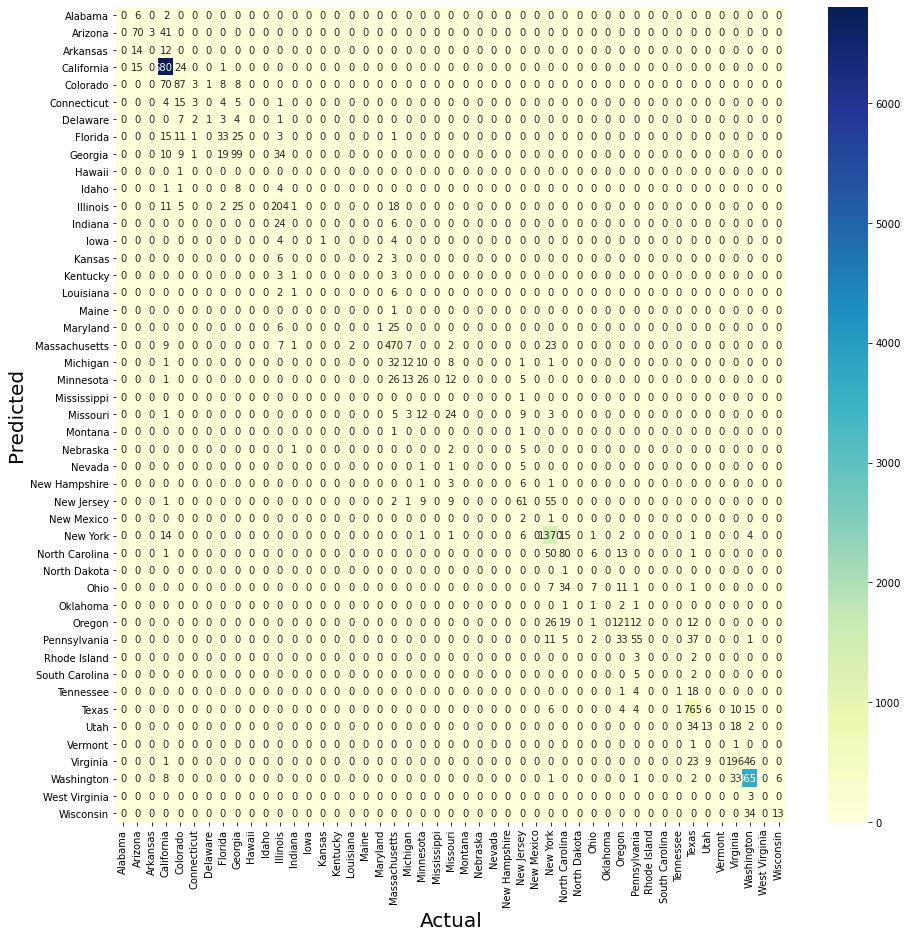

In [11]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
# def confusion_matrix_plot(ytest,y_pred):
labels=unique_labels(Ytest)
column=[f'{label}'for label in labels]
indeces=[f'{label}'for label in labels]
table = pd.DataFrame(confusion_matrix(Ytest,y_pred_knn),columns=column,index=indeces)
fig, ax = plt.subplots(figsize=(15,15)) 
ps=sns.heatmap(table,annot=True, fmt='d',cmap='YlGnBu')
ps.set_xlabel("Actual",fontsize=20)
ps.set_ylabel("Predicted",fontsize=20)

### ROC - AUC Curve for KNN

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


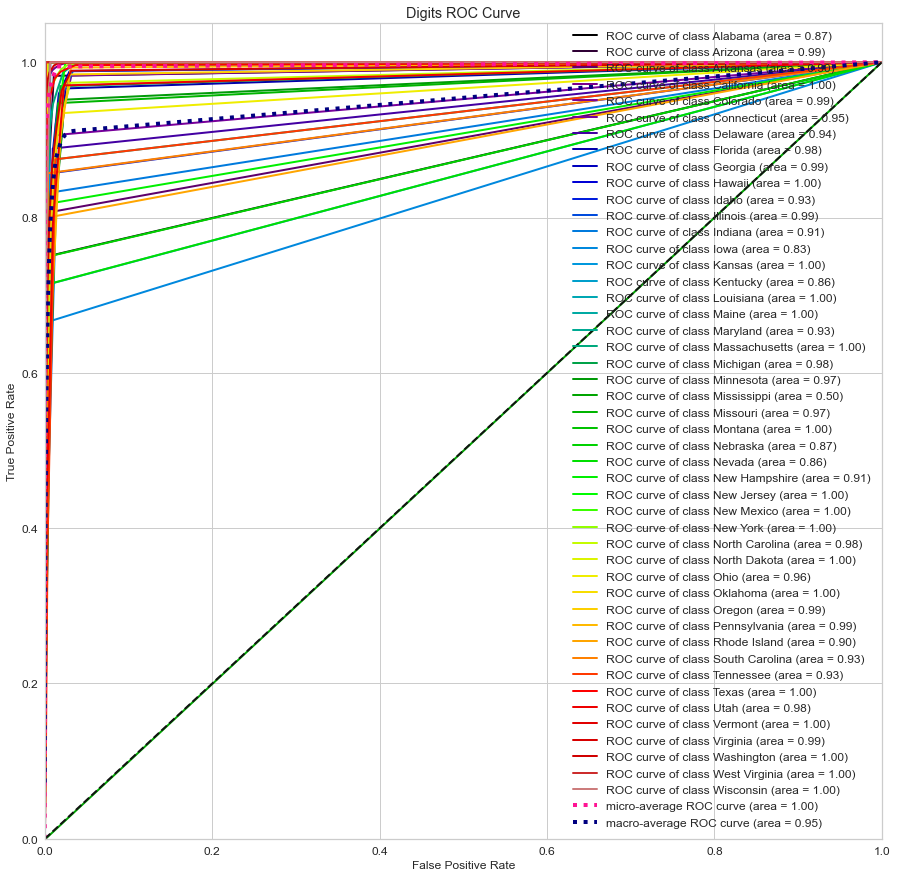

In [12]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,target_data,test_size=0.3,stratify=target_data)


Y_test_probs = knn_clf.predict_proba(Xtest)

skplt.metrics.plot_roc_curve(Ytest, Y_test_probs,
                       title="Digits ROC Curve", figsize=(15,15));

### Stratified K-fold For KNN

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(KNeighborsClassifier(n_neighbors=12))
#Xtrain,Xtest,Ytrain,Ytest
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(Xtrain, Ytrain)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(Xtrain.iloc[train, :], Ytrain.iloc[train])
    score = pipeline.score(Xtrain.iloc[test, :], Ytrain.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: , Accuracy: %.3f' % (k+1, score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fold:  1, Training/Test Split Distribution: , Accuracy: 0.903
Fold:  2, Training/Test Split Distribution: , Accuracy: 0.896
Fold:  3, Training/Test Split Distribution: , Accuracy: 0.899
Fold:  4, Training/Test Split Distribution: , Accuracy: 0.901
Fold:  5, Training/Test Split Distribution: , Accuracy: 0.897
Fold:  6, Training/Test Split Distribution: , Accuracy: 0.900
Fold:  7, Training/Test Split Distribution: , Accuracy: 0.898
Fold:  8, Training/Test Split Distribution: , Accuracy: 0.900
Fold:  9, Training/Test Split Distribution: , Accuracy: 0.898
Fold: 10, Training/Test Split Distribution: , Accuracy: 0.901


Cross-Validation accuracy: 0.899 +/- 0.002


### Hypertuning for KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,target_data,cv=10)
    accuracy_rate.append(score.mean())

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aswin\anaconda3\lib\site-packag

Text(0, 0.5, 'Accuracy')

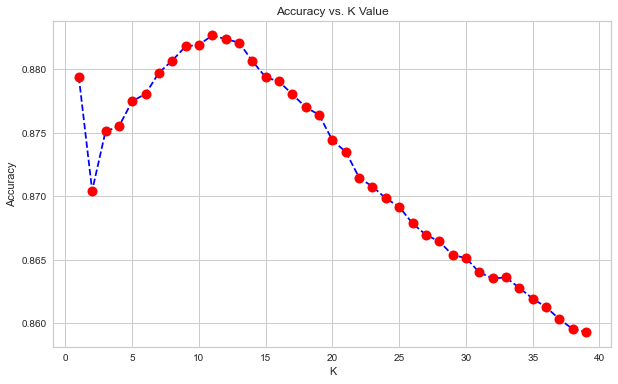

In [77]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### Misclassification Rate for KNN

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


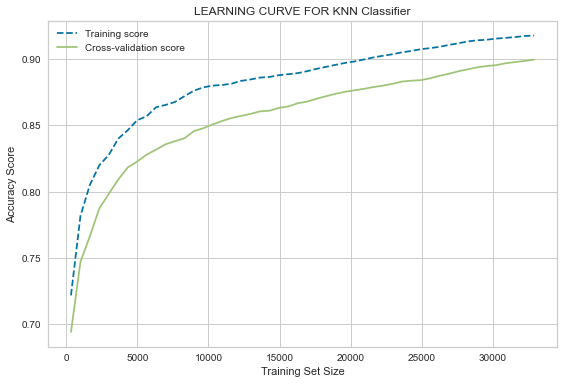

In [14]:
#Importing Required Libraries and Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# # Load data set
# dataset = load_digits()

# # X contains data and y contains labels
# X, y = dataset.data, dataset.target

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
cv=StratifiedKFold(n_splits=10)
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(n_neighbors=12), Xtrain, Ytrain, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b", label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [79]:
KNN_classifier = KNeighborsClassifier(n_neighbors=12) 
KNN_classifier.fit(Xtrain, Ytrain)
print(f'Final Training Accuracy: {KNN_classifier.score(Xtrain,Ytrain)*100}%')
print(f'testing Accuracy: {KNN_classifier.score(Xtest,Ytest)*100}%')

Final Training Accuracy: 92.14131415602526%
testing Accuracy: 90.43001148398622%


# AdaBoost

In [20]:
#Decision tree classifier ada boosted, needs parameter tuning
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=500,
                         learning_rate=0.01)
modelada = abc.fit(Xtrain, Ytrain)

yada_pred = modelada.predict(Xtest)
accuracy_score(Ytest, yada_pred)

0.9994258006890392

### Precision Recall F1-Score and Support for AdaBoost

In [18]:
print(classification_report(Ytest,yada_pred))

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

       Alabama       0.00      0.00      0.00         8
       Arizona       1.00      1.00      1.00       114
      Arkansas       0.76      1.00      0.87        26
    California       1.00      1.00      1.00      6847
      Colorado       1.00      1.00      1.00       177
   Connecticut       1.00      1.00      1.00        32
      Delaware       1.00      1.00      1.00        18
       Florida       1.00      1.00      1.00        89
       Georgia       1.00      1.00      1.00       172
        Hawaii       1.00      1.00      1.00         1
         Idaho       1.00      1.00      1.00        14
      Illinois       1.00      1.00      1.00       266
       Indiana       0.81      1.00      0.90        30
          Iowa       1.00      1.00      1.00         9
        Kansas       1.00      1.00      1.00        11
      Kentucky       0.00      0.00      0.00         7
     Louisiana       1.00      1.00      1.00  

### Confusion Matrix For Adaboost

Text(115.0, 0.5, 'Predicted')

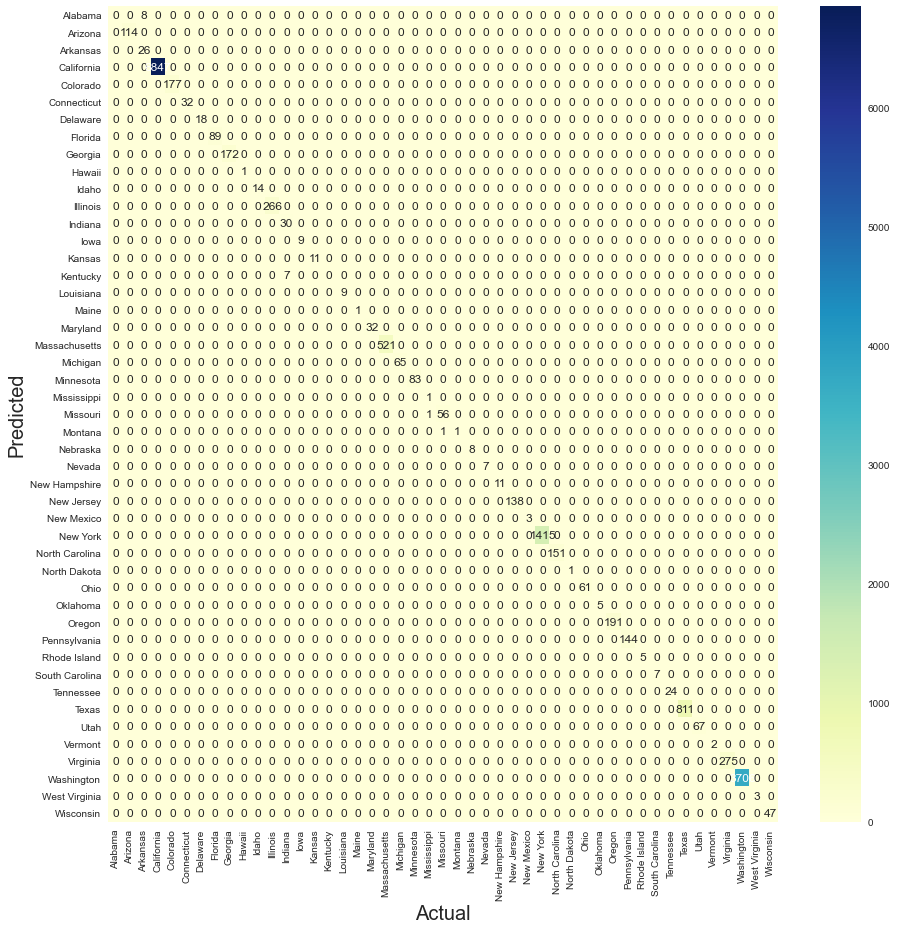

In [19]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
# def confusion_matrix_plot(ytest,y_pred):
labels=unique_labels(Ytest)
column=[f'{label}'for label in labels]
indeces=[f'{label}'for label in labels]
table = pd.DataFrame(confusion_matrix(Ytest,yada_pred),columns=column,index=indeces)
fig, ax = plt.subplots(figsize=(15,15)) 
ps=sns.heatmap(table,annot=True, fmt='d',cmap='YlGnBu')
ps.set_xlabel("Actual",fontsize=20)
ps.set_ylabel("Predicted",fontsize=20)

### AUC ROC curve Adaboost

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


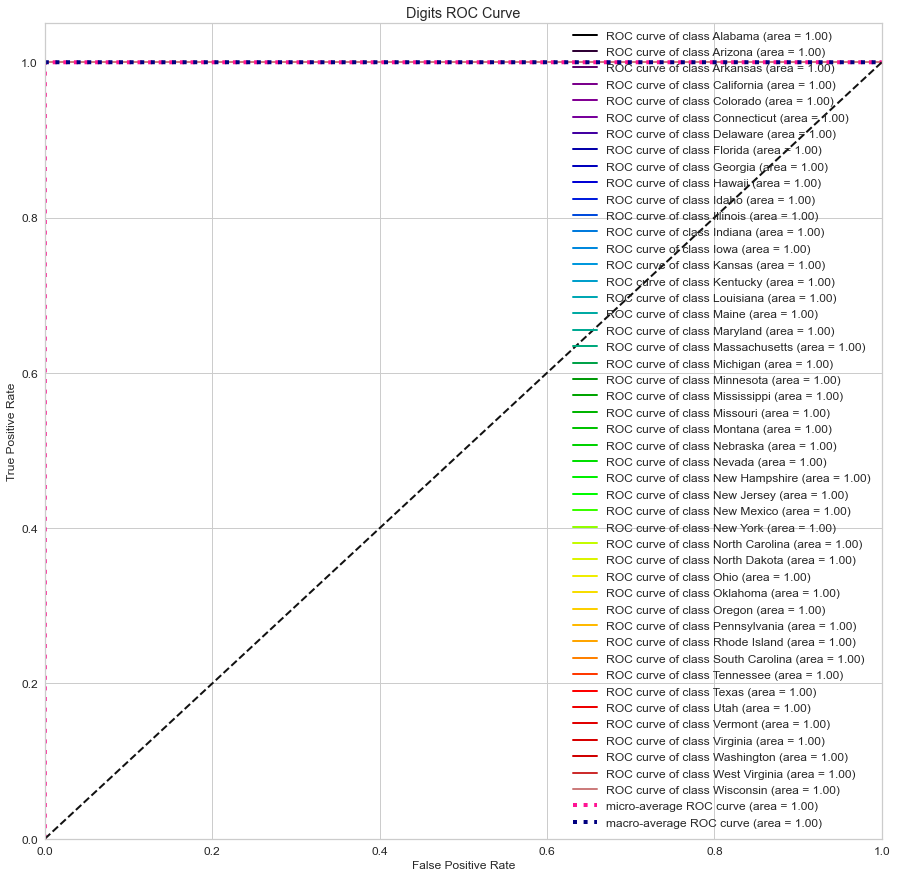

In [20]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,target_data,test_size=0.3,stratify=target_data)


Y_test_probs = abc.predict_proba(Xtest)

skplt.metrics.plot_roc_curve(Ytest, Y_test_probs,
                       title="Digits ROC Curve", figsize=(15,15));

### Stratified K-fold For AdaBoost

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
pipeline = make_pipeline(AdaBoostClassifier(n_estimators=500,
                         learning_rate=0.01))
#Xtrain,Xtest,Ytrain,Ytest
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(Xtrain, Ytrain)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(Xtrain.iloc[train, :], Ytrain.iloc[train])
    score = pipeline.score(Xtrain.iloc[test, :], Ytrain.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: , Accuracy: %.3f' % (k+1, score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: , Accuracy: 0.999
Fold:  2, Training/Test Split Distribution: , Accuracy: 0.999
Fold:  3, Training/Test Split Distribution: , Accuracy: 1.000
Fold:  4, Training/Test Split Distribution: , Accuracy: 1.000
Fold:  5, Training/Test Split Distribution: , Accuracy: 1.000
Fold:  6, Training/Test Split Distribution: , Accuracy: 1.000
Fold:  7, Training/Test Split Distribution: , Accuracy: 0.999
Fold:  8, Training/Test Split Distribution: , Accuracy: 0.999
Fold:  9, Training/Test Split Distribution: , Accuracy: 0.999
Fold: 10, Training/Test Split Distribution: , Accuracy: 0.999


Cross-Validation accuracy: 0.999 +/- 0.000


### Misclassification Rate for Adaboost before Hyper Tuning

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


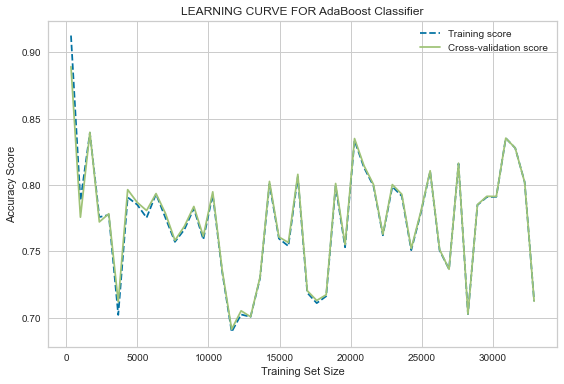

In [16]:
#Importing Required Libraries and Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

# # Load data set
# dataset = load_digits()

# # X contains data and y contains labels
# X, y = dataset.data, dataset.target

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
cv=StratifiedKFold(n_splits=10)
sizes, training_scores, testing_scores = learning_curve(AdaBoostClassifier(n_estimators=50,
                         learning_rate=1), Xtrain, Ytrain, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b", label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation s core")

# Drawing plot
plt.title("LEARNING CURVE FOR AdaBoost Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Misclassification Rate for Adaboost After Hyper Tuning

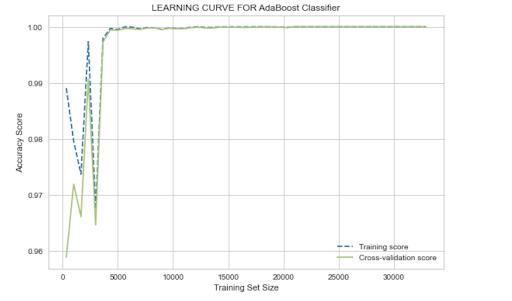

In [17]:
def learn_curve(X,y,c):

    
    le = preprocessing.LabelEncoder() # Label encoding the target
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    log_reg = AdaBoostClassifier(n_estimators=500,
                         learning_rate=0.01) # LogisticRegression model
# Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',log_reg]))
    
    
    cv = StratifiedKFold(n_splits=10,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    
    
    lr.fit(X,y) # Fitting the model

    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Accuracies:
-------------------------
[0.9997266265718973, 0.9989062072737216, 0.9989062072737216, 0.9994531036368608, 0.9989062072737216, 0.9991796554552912, 0.9991796554552912, 0.9994531036368608, 0.9997265518184304, 0.9989062072737216]

Mean Cross Validation Accuracy:
-------------------------
0.9992343525669518

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.0003189041771752729

Training Accuracy:
---------------
0.9990703016050969




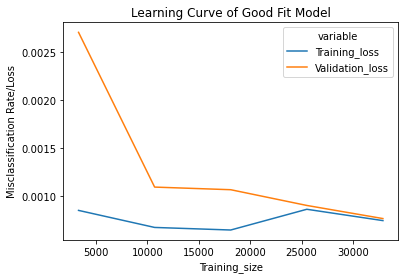

In [18]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#Decision tree classifier ada boosted, needs parameter tuning
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
lc = learn_curve(Xtrain,Ytrain,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of Good Fit Model")
plt.ylabel("Misclassification Rate/Loss");

# XGBoost

In [9]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
# fit model no training data
XGB_clf = XGBClassifier(learning_rate=0.01,max_depth=3, n_estimators=50)
XGB_clf.fit(Xtrain, Ytrain)
# make predictions for test data
y_pred_XG = XGB_clf.predict(Xtest)
print(accuracy_score(Ytest, y_pred_XG))


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9992344009187188


### Precision Recall F1-Score and Support XGBoost

In [10]:
print(classification_report(Ytest,y_pred_XG))

                precision    recall  f1-score   support

       Alabama       1.00      0.88      0.93         8
       Arizona       0.99      1.00      1.00       114
      Arkansas       1.00      0.96      0.98        26
    California       1.00      1.00      1.00      6847
      Colorado       1.00      1.00      1.00       177
   Connecticut       1.00      1.00      1.00        32
      Delaware       1.00      1.00      1.00        18
       Florida       1.00      1.00      1.00        89
       Georgia       0.99      1.00      1.00       172
        Hawaii       0.00      0.00      0.00         1
         Idaho       1.00      0.79      0.88        14
      Illinois       1.00      1.00      1.00       266
       Indiana       1.00      1.00      1.00        30
          Iowa       0.75      1.00      0.86         9
        Kansas       1.00      1.00      1.00        11
      Kentucky       1.00      1.00      1.00         7
     Louisiana       1.00      1.00      1.00  

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix For XGBoost

Text(114.0, 0.5, 'Predicted')

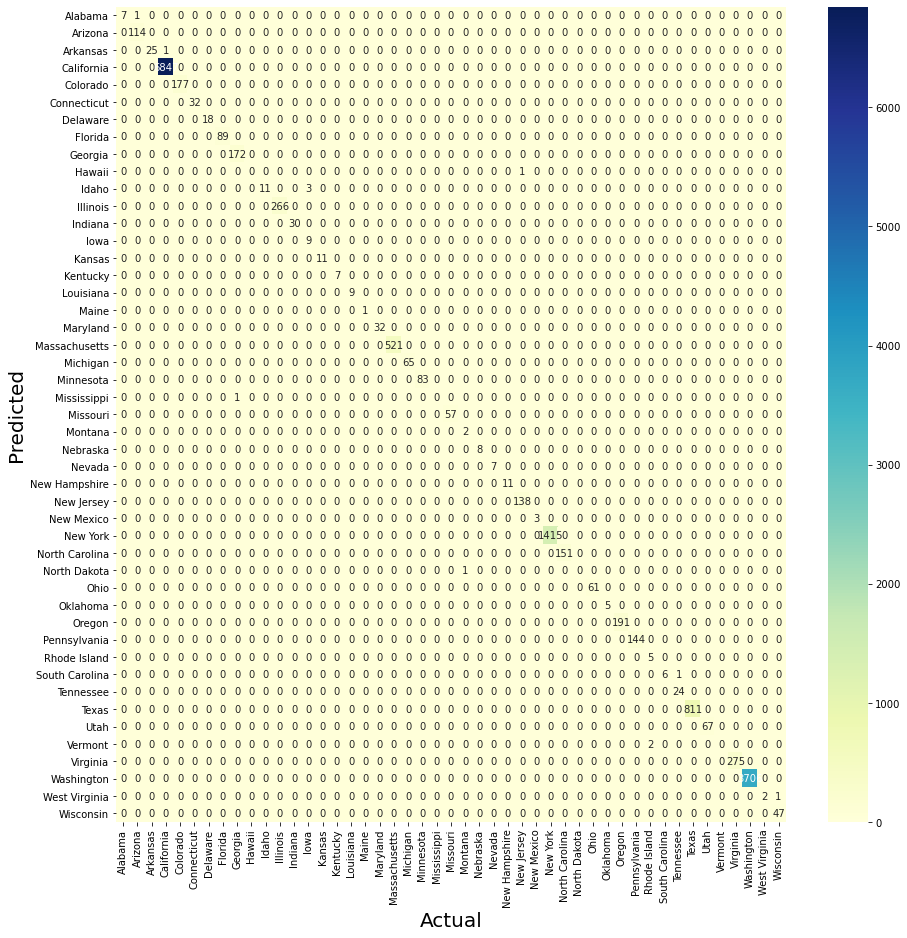

In [11]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

labels=unique_labels(Ytest)
column=[f'{label}'for label in labels]
indeces=[f'{label}'for label in labels]
table = pd.DataFrame(confusion_matrix(Ytest,y_pred_XG),columns=column,index=indeces)
fig, ax = plt.subplots(figsize=(15,15)) 
ps=sns.heatmap(table,annot=True, fmt='d',cmap='YlGnBu')
ps.set_xlabel("Actual",fontsize=20)
ps.set_ylabel("Predicted",fontsize=20)

### AUC ROC curve XGBoost

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


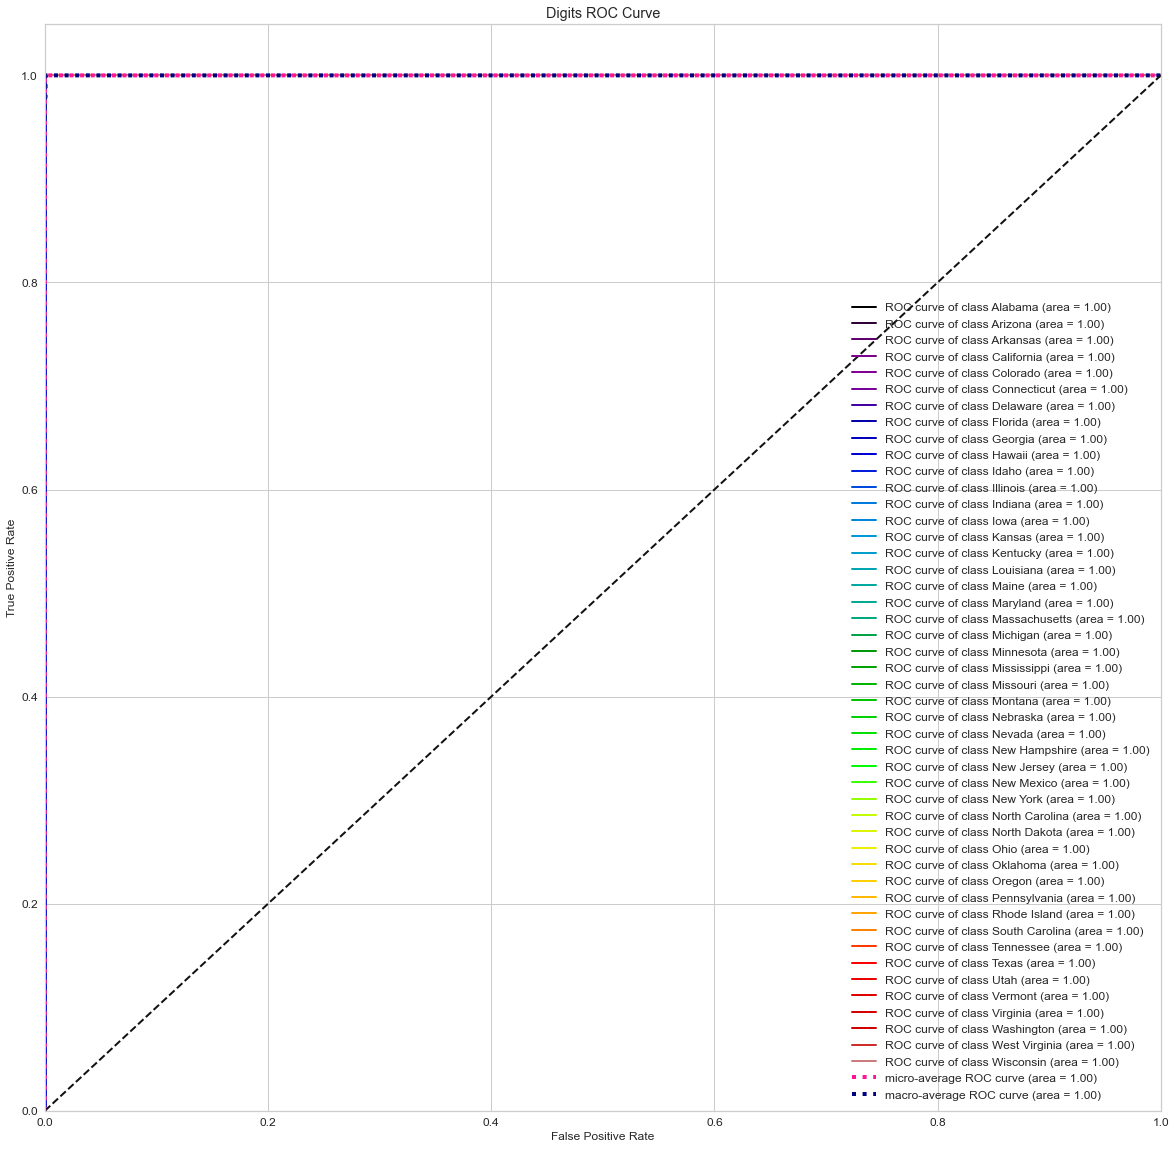

In [12]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,target_data,test_size=0.3,stratify=target_data)


Y_test_probs = XGB_clf.predict_proba(Xtest)

skplt.metrics.plot_roc_curve(Ytest, Y_test_probs,
                       title="Digits ROC Curve", figsize=(20,20));

### Stratified K-fold For XG Boost

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(XGBClassifier())
#Xtrain,Xtest,Ytrain,Ytest
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(Xtrain, Ytrain)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(Xtrain.iloc[train, :], Ytrain.iloc[train])
    score = pipeline.score(Xtrain.iloc[test, :], Ytrain.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: , Accuracy: %.3f' % (k+1, score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  1, Training/Test Split Distribution: , Accuracy: 0.999
[22:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  2, Training/Test Split Distribution: , Accuracy: 1.000
[22:30:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly se

### Misclassification Rate for XGBoost After Hypertuning

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

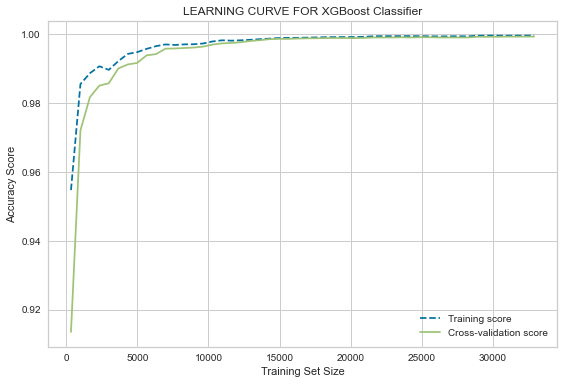

In [13]:
#Importing Required Libraries and Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

# # Load data set
# dataset = load_digits()

# # X contains data and y contains labels
# X, y = dataset.data, dataset.target

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
cv=StratifiedKFold(n_splits=10)
sizes, training_scores, testing_scores = learning_curve(XGBClassifier(learning_rate=0.01,max_depth=3, n_estimators=50), Xtrain, Ytrain, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b", label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR XGBoost Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


### Misclassification Rate for XGBoost Before Hypertuning

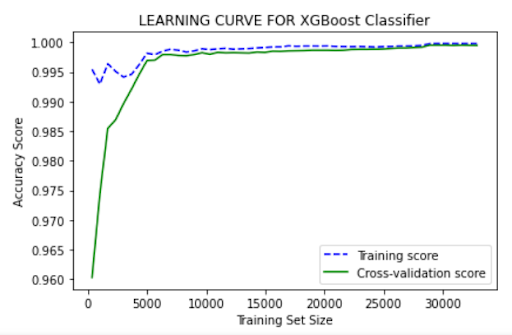

In [15]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def learn_curve(X,y,c):

    
    le = preprocessing.LabelEncoder() # Label encoding the target
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    log_reg = XGBClassifier(learning_rate=0.01,max_depth=3, n_estimators=50, subsample=0.8,colsample_bytree=1,gamma=1) # LogisticRegression model
# Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',log_reg]))
    
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    
    
    lr.fit(X,y) # Fitting the model

    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross Validation Accuracies:
-------------------------
[0.9991797676008203, 0.9994531036368608, 0.9991796554552912, 0.9989062072737216, 0.9989062072737216]

Mean Cross Validation Accuracy:
-------------------------
0.9991249882480832

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.00020463588095352068

Training Accuracy:
---------------
0.9995351508025485




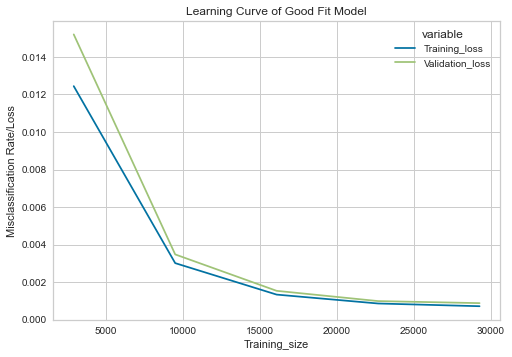

In [16]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lc = learn_curve(Xtrain,Ytrain,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of Good Fit Model")
plt.ylabel("Misclassification Rate/Loss");

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# # split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# # define the model
model = XGBClassifier(learning_rate=0.01,max_depth=3, n_estimators=50, subsample=0.8,colsample_bytree=1,gamma=1)
# define the datasets to evaluate each iteration
evalset = [(Xtrain, Ytrain), (Xtest,Ytest)]

model.fit(Xtrain, Ytrain, eval_metric='mlogloss', eval_set=evalset)
# evaluate performance



/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:3.62221	validation_1-mlogloss:3.62229
[1]	validation_0-mlogloss:3.44006	validation_1-mlogloss:3.44017
[2]	validation_0-mlogloss:3.28844	validation_1-mlogloss:3.28843
[3]	validation_0-mlogloss:3.15794	validation_1-mlogloss:3.15794
[4]	validation_0-mlogloss:3.04295	validation_1-mlogloss:3.04303
[5]	validation_0-mlogloss:2.94059	validation_1-mlogloss:2.94054
[6]	validation_0-mlogloss:2.84827	validation_1-mlogloss:2.84820
[7]	validation_0-mlogloss:2.76397	validation_1-mlogloss:2.76397
[8]	validation_0-mlogloss:2.68637	validation_1-mlogloss:2.68632
[9]	validation_0-mlogloss:2.61445	validation_1-mlogloss:2.61444
[10]	validation_0-mlogloss:2.54784	validation_1-mlogloss:2.54778
[11]	validation_0-mlogloss:2.48530	validation_1-mlogloss:2.48523
[12]	validation_0-mlogloss:2.42670	validation_1-mlogloss:2.42664
[13]	validation_0-mlogloss:2.37134	validation_1-mlogloss:2.37129
[14]	validation_0-mlogloss:2.31900	validation_1-mlogloss:2.31892
[15]	validation_0-mlogloss:2.26923	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

Accuracy: 0.999


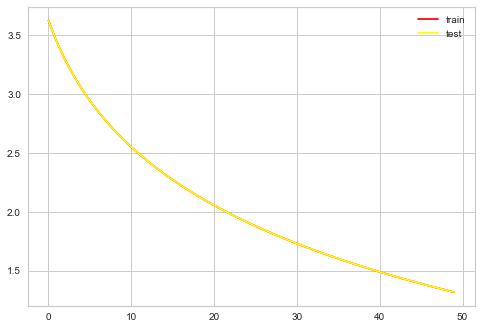

In [17]:
yhat = model.predict(Xtest)
score = accuracy_score(Ytest, yhat)
print('Accuracy: %.3f' % score)
# # retrieve performance metrics
results = model.evals_result()
# # plot learning curves
pyplot.plot(results['validation_0']['mlogloss'], label='train', c='red')
pyplot.plot(results['validation_1']['mlogloss'], label='test', c='yellow')
# # show the legend
pyplot.legend()
# # show the plot
pyplot.show()


In [17]:
from sklearn.ensemble import RandomForestClassifier
XGBoost_classifier = XGBClassifier(learning_rate=0.01,max_depth=3, n_estimators=50, subsample=0.8,colsample_bytree=1,gamma=1) 
XGBoost_classifier.fit(Xtrain, Ytrain)
print(f'Final Training Accuracy: {XGBoost_classifier.score(Xtrain,Ytrain)*100}%')
print(f'Model Accuracy: {XGBoost_classifier.score(Xtest,Ytest)*100}%')

C:\Users\aswin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Final Training Accuracy: 99.95351508025485%
Model Accuracy: 99.95534005359194%


In [ ]:
import pickle
pickle_out=open("Adaboost_data245.pkl","wb")
pickle.dump(XGB_clf,pickle_out)
pickle_out.close()